# Summary
This machine learning model uses marvel_rivals data to predict whether the player is going to win or lose the NEXT MATCH using each characters. The model predicts the result with 79% accuracy using classification models, logistic regression.

## Plan
1. Get Data
    - cannot web scrape tracker.gg website
    - extract data manually from the website
    - get my own Marvel Rivals profile stats
2. Analysis
    - visualize data distributions
3. Data Preprocessing
   - create new columns
4. Data Split
   - group categorical, numerical columns
   - transform all columns using scaling methods
   - create a train test split
5. Model selection
    - use every classifier models
    - check for best accuracy and best model
6. Model Evaluation
    - make an accuracy report for test data
7. Save model for future use


## Get Data

In [168]:
import pandas as pd

dataset = pd.read_excel("rivals_report.xlsx")
df = dataset
df.head()

,Character,Type,season,num_matches,win_rate,num_MVP,num_SVP,dmg_per_min,heal_per_min,kill_death,kill_death_assist,kills,assists,deaths,avg_kda,hours_played
0,black panther,Duelist,0: Doom's Rise,58.2,53.3,5.0,4.0,1140.0,0.0,1.89,1.89,876.0,1.0,464.0,1.89,10.0
1,black widow,Duelist,0: Doom's Rise,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0
2,hawkeye,Duelist,0: Doom's Rise,4.5,75.6,0.0,0.0,990.0,0.0,1.82,2.35,73.0,21.0,40.0,2.35,0.8
3,hela,Duelist,0: Doom's Rise,0.2,0.0,0.0,0.0,1426.0,0.0,2.00,2.00,4.0,0.0,2.0,2.00,0.0
4,human torch,Duelist,0: Doom's Rise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
df.shape

(111, 16)

In [170]:
df.isnull().sum(axis = 1)

0       0
1       0
2       0
3       0
4      13
       ..
106     0
107    13
108     0
109     0
110    13
Length: 111, dtype: int64

## Analysis
1. Histogram
2. Scatter plot
3. Pairs plot

In [173]:
df.dropna(axis = 0, inplace = True) 

In [174]:
df.shape

(80, 16)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 0 to 109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Character          80 non-null     object 
 1   Type               80 non-null     object 
 2   season             80 non-null     object 
 3   num_matches        80 non-null     float64
 4   win_rate           80 non-null     float64
 5   num_MVP            80 non-null     float64
 6   num_SVP            80 non-null     float64
 7   dmg_per_min        80 non-null     float64
 8   heal_per_min       80 non-null     float64
 9   kill_death         80 non-null     float64
 10  kill_death_assist  80 non-null     float64
 11  kills              80 non-null     float64
 12  assists            80 non-null     float64
 13  deaths             80 non-null     float64
 14  avg_kda            80 non-null     float64
 15  hours_played       80 non-null     float64
dtypes: float64(13), object(3)
memory

'avg_kda' has a row that is an object

In [176]:
not_num= pd.to_numeric(df['avg_kda'], errors = 'coerce').isna()
df[not_num]

,Character,Type,season,num_matches,win_rate,num_MVP,num_SVP,dmg_per_min,heal_per_min,kill_death,kill_death_assist,kills,assists,deaths,avg_kda,hours_played


In [177]:
df.columns

Index(['Character', 'Type', 'season', 'num_matches', 'win_rate', 'num_MVP',
       'num_SVP', 'dmg_per_min', 'heal_per_min', 'kill_death',
       'kill_death_assist', 'kills', 'assists', 'deaths', 'avg_kda',
       'hours_played'],
      dtype='object')

In [178]:
use_df = df.copy()

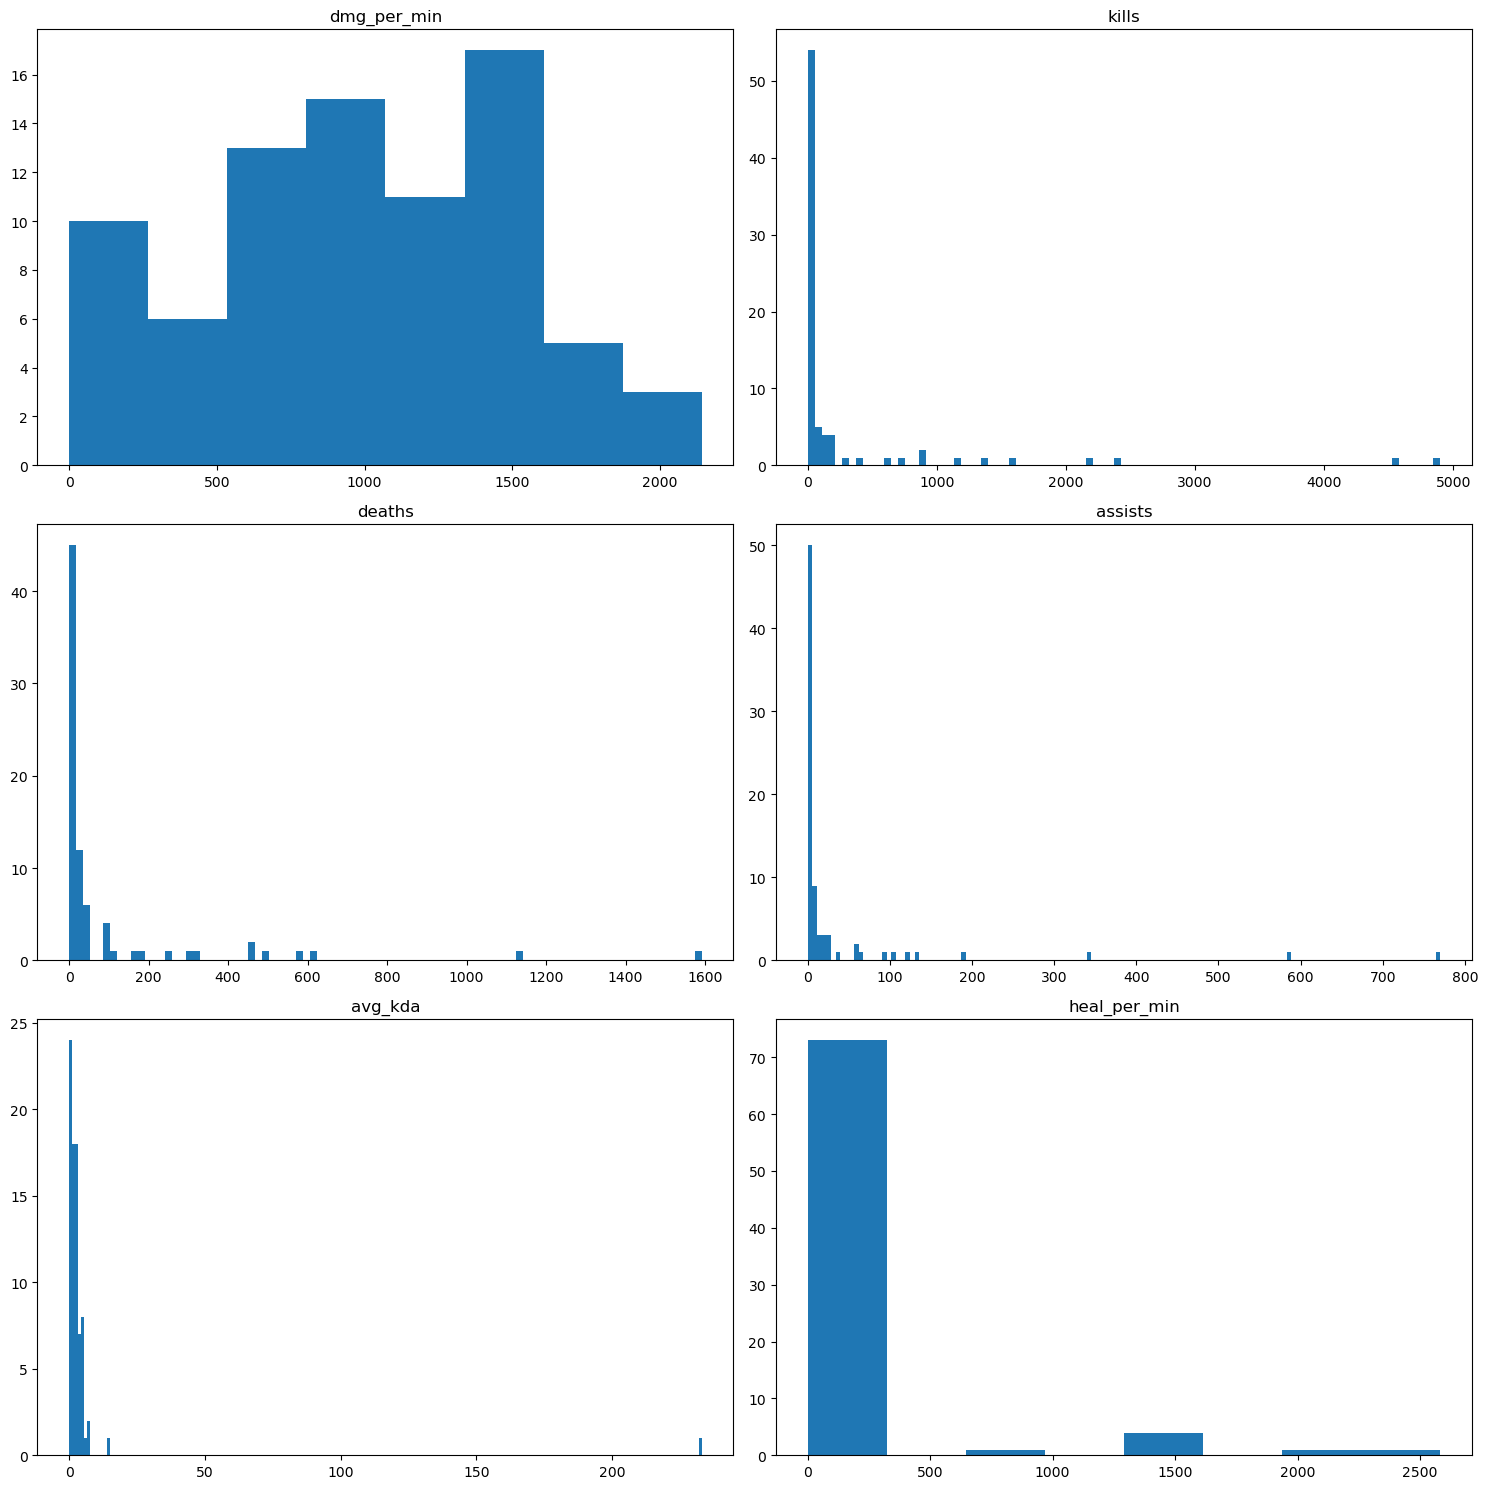

In [208]:
#plot outliers using matplot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 2, figsize=(15,15))
ax[0,0].hist(use_df['dmg_per_min'], bins = "auto")
ax[0,1].hist(use_df['kills'], bins = "auto")
ax[1,0].hist(use_df['deaths'], bins = "auto")
ax[1,1].hist(use_df['assists'], bins = "auto")
ax[2,0].hist(use_df['avg_kda'], bins = "auto")
ax[2,1].hist(use_df['heal_per_min'], bins = "auto")

ax[0,0].set_title("dmg_per_min")
ax[0,1].set_title("kills")
ax[1,0].set_title("deaths")
ax[1,1].set_title("assists")
ax[2,0].set_title("avg_kda")
ax[2,1].set_title("heal_per_min")

fig.tight_layout()

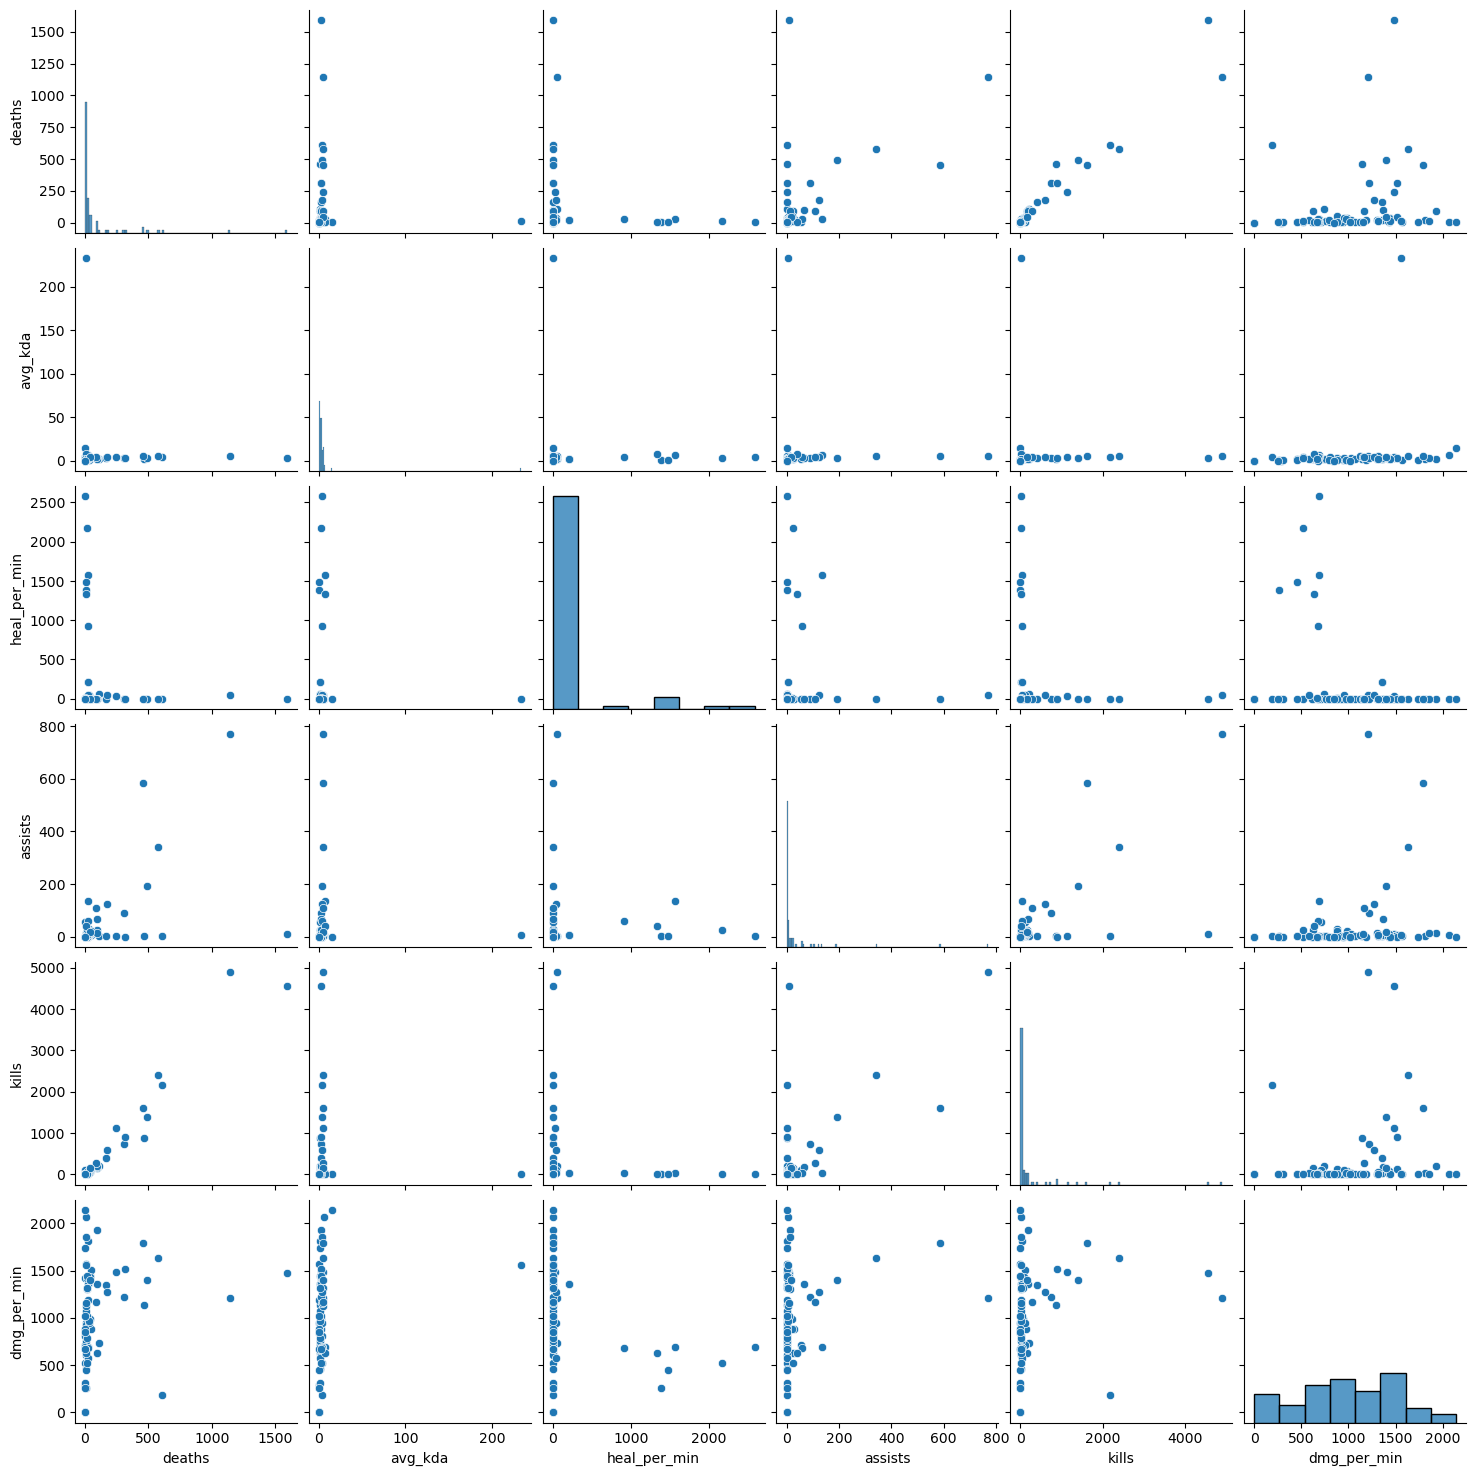

In [180]:
#using seaborn
import seaborn as sns
num_var = use_df[['deaths','avg_kda','heal_per_min','assists','kills','dmg_per_min']]
pairplot = sns.pairplot(num_var)
plt.show()

deaths             Axes(0.125,0.653529;0.227941x0.226471)
avg_kda         Axes(0.398529,0.653529;0.227941x0.226471)
heal_per_min    Axes(0.672059,0.653529;0.227941x0.226471)
assists            Axes(0.125,0.381765;0.227941x0.226471)
kills           Axes(0.398529,0.381765;0.227941x0.226471)
dmg_per_min     Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

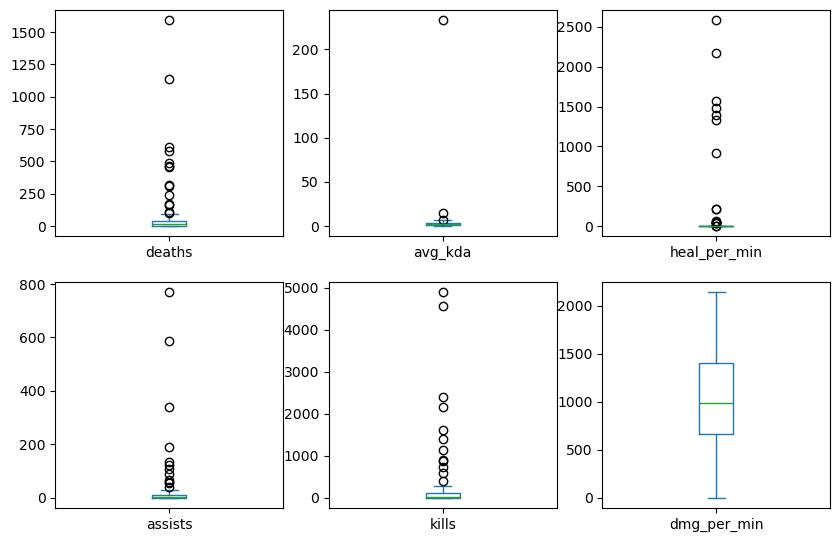

In [181]:
#using boxplot
num_var.plot(kind="box", subplots=True, layout=(3,3), figsize=(10,10)) 

### Automated EDA

In [182]:
#pip install ydata-profiling

# from ydata_profiling import ProfileReport
# profile = ProfileReport(use_df, title = "Profiling Report")
# profile.to_file("rivals_profile_report.html")

In [183]:
#remove 7 duplicated rows
use_df = use_df.drop_duplicates()
use_df.shape

(80, 16)

### Correlation

In [184]:
num_var.corr()

,deaths,avg_kda,heal_per_min,assists,kills,dmg_per_min
deaths,1.000000,-0.023797,-0.100377,0.555068,0.974420,0.211396
avg_kda,-0.023797,1.000000,-0.021585,-0.004933,-0.019279,0.161502
heal_per_min,-0.100377,-0.021585,1.000000,0.000005,-0.096942,-0.225830
assists,0.555068,-0.004933,0.000005,1.000000,0.671126,0.202677
kills,0.974420,-0.019279,-0.096942,0.671126,1.000000,0.198380
dmg_per_min,0.211396,0.161502,-0.225830,0.202677,0.198380,1.000000


<Axes: >

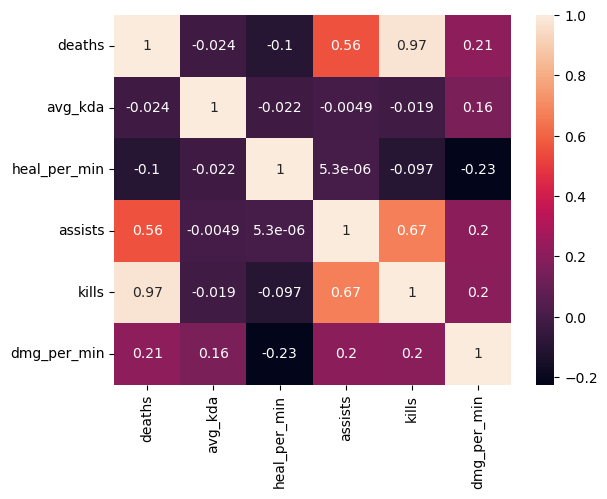

In [185]:
#seaborn heatmap
sns.heatmap(num_var.corr(), annot = True)

*best correlations are: deaths - kills, assists - kills, assists - deaths*

## Data Preprocessing
- Create custom columns
    - Score: weighted formula to determine whether I could win if I chose to use that character in that season
        - use ((w1 * col1) + (w2 * col2) + (w3 * col3)) - (w4 * col4)
        - weight depends on how much the column affects the win
        - calculate median and set them as threshold
    - win_1_lose_0: if score is bigger than median (actual players may have meaningful outliers), then its a win
    - dmg_to_healing: ratio
    - dmg_to_kills: ratio
    - dmg_to_deaths: ratio
    - dmg_to_assists: ratio

In [186]:
use_df.columns

Index(['Character', 'Type', 'season', 'num_matches', 'win_rate', 'num_MVP',
       'num_SVP', 'dmg_per_min', 'heal_per_min', 'kill_death',
       'kill_death_assist', 'kills', 'assists', 'deaths', 'avg_kda',
       'hours_played'],
      dtype='object')

### Custom Columns

In [187]:
score_win_df = use_df.copy()

Testing 
- weights : 1 to 10                      
def create_score(data, w1, w2, w3, w4):
    data_copy = data.copy()
 
    data_copy['score'] = ((w1 * data_copy['kills']) + (w2 * data_copy['assists']) + 
                         (w3 * data_copy['dmg_per_min'])) - (w4 * data_copy['deaths'])
  
    return data_copy
    
score_win_df = create_score(data=score_win_df, w1=6, w2=2, w3=6, w4=10)

- Calculate a threshold based on the median or mean score

  
median_threshold = score_win_df['score'].median()

- Create predictions using the median threshold


def create_win(data, threshold):

    data_copy = data.copy()
    
    data_copy['win_1_lose_0'] = (data_copy['score'] > threshold).astype(int)
    
    return data_copy

- Apply the threshold

  
score_win_df = create_win(score_win_df, median_threshold)

def dmg_to_cols(data):

    data_copy = data.copy()
    
    some cols have 0. We need to avoid by making the result 0 directly
    
    data_copy['dmg_to_kills'] = np.where(data_copy['kills'] > 0, 
    
                                         data_copy['dmg_per_min'] / data_copy['kills'], 
                                         
                                         0)
    
    data_copy['dmg_to_deaths'] = np.where(data_copy['deaths'] > 0, 
    
                                          data_copy['dmg_per_min'] / data_copy['deaths'], 
                                          
                                          0)
    
    data_copy['dmg_to_assists'] = np.where(data_copy['assists'] > 0, 
    
                                           data_copy['dmg_per_min'] / data_copy['assists'], 
                                           
                                           0)
    
    return data_copy

score_win_df = dmg_to_cols(score_win_df)

In [188]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombineAttributes(BaseEstimator, TransformerMixin):
    '''
    'score' (always added)
    'dmg_to_kills' (added if add_dmg_to_performance_ratio=True)
    'dmg_to_deaths' (added if add_dmg_to_performance_ratio=True)
    'dmg_to_assists' (added if add_dmg_to_performance_ratio=True)
    'win_1_lose_0' (added if win_prediction=True)
    '''
    def __init__(self, weight_kill=6, weight_assist=2, weight_dmg=6, weight_death=10,
                 add_dmg_to_performance_ratio=True, win_prediction=True):
        self.weight_kill = weight_kill
        self.weight_assist = weight_assist
        self.weight_dmg = weight_dmg
        self.weight_death = weight_death
        self.add_dmg_to_performance_ratio = add_dmg_to_performance_ratio
        self.win_prediction = win_prediction
        self.threshold_ = None
        
    def fit(self, X, y=None):
        # Check if X is a DataFrame or ndarray
        if isinstance(X, np.ndarray):
            # Convert to DataFrame with appropriate column names
            X = pd.DataFrame(X, columns=['Character', 'Type', 'season', 'num_matches', 'win_rate', 
                                         'num_MVP', 'num_SVP', 'dmg_per_min', 'heal_per_min', 
                                         'kill_death', 'kill_death_assist', 'kills', 'assists', 
                                         'deaths', 'avg_kda', 'hours_played'])
        
        scores = ((self.weight_kill * X['kills']) + 
                  (self.weight_assist * X['assists']) + 
                  (self.weight_dmg * X['dmg_per_min'])) - \
                  (self.weight_death * X['deaths'])
        
        self.threshold_ = scores.median()
        return self

    def transform(self, X, y=None):
        
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X, columns=['Character', 'Type', 'season', 'num_matches', 'win_rate', 
                                         'num_MVP', 'num_SVP', 'dmg_per_min', 'heal_per_min', 
                                         'kill_death', 'kill_death_assist', 'kills', 'assists', 
                                         'deaths', 'avg_kda', 'hours_played'])
        
        result = X.copy()
        
        # Print information for debugging
        # print("Data types:", result.dtypes)
        # print("Any NaN in source columns?", 
        #       result[['kills', 'deaths', 'assists', 'dmg_per_min']].isna().any())
        
        # Calculate score - handle NaN values
        result['score'] = ((self.weight_kill * result['kills'].fillna(0)) + 
                          (self.weight_assist * result['assists'].fillna(0)) + 
                          (self.weight_dmg * result['dmg_per_min'].fillna(0)) - 
                          (self.weight_death * result['deaths'].fillna(0)))
        
        if self.add_dmg_to_performance_ratio:
            # Ensure no NaN values before division
            kills = result['kills'].fillna(0)
            deaths = result['deaths'].fillna(0)
            assists = result['assists'].fillna(0)
            dmg = result['dmg_per_min'].fillna(0)
            
            # Calculate ratios with proper NaN handling
            result['dmg_to_kills'] = np.where(kills > 0, dmg / kills, 0)
            result['dmg_to_deaths'] = np.where(deaths > 0, dmg / deaths, 0)
            result['dmg_to_assists'] = np.where(assists > 0, dmg / assists, 0)
        
        if self.win_prediction:
            # Make sure threshold exists
            if self.threshold_ is None:
                print("Warning: threshold_ is None, calculating now")
                self.threshold_ = result['score'].median()
            
            result['win_1_lose_0'] = (result['score'] > self.threshold_).astype(int)
        
        # Verify results
        # print("Any NaN in calculated columns?", 
        #       result[['score', 'dmg_to_kills', 'dmg_to_deaths', 
        #              'dmg_to_assists', 'win_1_lose_0']].isna().any())
        
        return result
    
    def get_feature_names_out(self, input_features=None):
        features = ['score']
        
        if self.add_dmg_to_performance_ratio:
            features.extend(['dmg_to_kills', 'dmg_to_deaths', 'dmg_to_assists'])
            
        if self.win_prediction:
            features.append('win_1_lose_0')
            
        return np.array(features)

In [189]:
attr_adder = CombineAttributes()
use_df_extra_attribs = attr_adder.transform(use_df.values)

C:\Users\Sroeunchamroeunphal\AppData\Local\Temp\ipykernel_2420\2364944360.py:54: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result['score'] = ((self.weight_kill * result['kills'].fillna(0)) +
C:\Users\Sroeunchamroeunphal\AppData\Local\Temp\ipykernel_2420\2364944360.py:55: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  (self.weight_assist * result['assists'].fillna(0)) +
C:\Users\Sroeunchamroeunphal\AppData\Local\Temp\ipykernel_2420\2364944360.py:56: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change 

In [190]:
og_cols = list(use_df.columns)
extra_attributes = ['score','dmg_to_kills','dmg_to_deaths','dmg_to_assists',
                    'win_1_lose_0']

new_cols = og_cols + extra_attributes
player_extra_df = pd.DataFrame(use_df_extra_attribs, columns=new_cols)

In [191]:
player_extra_df.head()

,Character,Type,season,num_matches,win_rate,num_MVP,num_SVP,dmg_per_min,heal_per_min,kill_death,...,kills,assists,deaths,avg_kda,hours_played,score,dmg_to_kills,dmg_to_deaths,dmg_to_assists,win_1_lose_0
0,black panther,Duelist,0: Doom's Rise,58.2,53.3,5.0,4.0,1140.0,0.0,1.89,...,876.0,1.0,464.0,1.89,10.0,7458.0,1.301370,2.456897,1140.000000,1
1,black widow,Duelist,0: Doom's Rise,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0
2,hawkeye,Duelist,0: Doom's Rise,4.5,75.6,0.0,0.0,990.0,0.0,1.82,...,73.0,21.0,40.0,2.35,0.8,6020.0,13.561644,24.750000,47.142857,0
3,hela,Duelist,0: Doom's Rise,0.2,0.0,0.0,0.0,1426.0,0.0,2.0,...,4.0,0.0,2.0,2.0,0.0,8560.0,356.500000,713.000000,0.000000,1
4,iron fist,Duelist,0: Doom's Rise,16.5,64.8,0.0,1.0,738.0,61.0,1.89,...,204.0,2.0,108.0,1.91,2.5,4576.0,3.617647,6.833333,369.000000,0


In [192]:
mean = num_score_win_df['score'].mean()
std = num_score_win_df['score'].std()

upper_limit = mean + (3 * std) 
lower_limit = mean - (3 * std)  

#find outliers
outliers = num_score_win_df.loc[(num_score_win_df['score'] > upper_limit) | (num_score_win_df['score'] < lower_limit)]
outliers

,num_matches,win_rate,num_MVP,num_SVP,dmg_per_min,heal_per_min,kill_death,kill_death_assist,kills,assists,deaths,avg_kda,hours_played,score,dmg_to_kills,dmg_to_deaths,dmg_to_assists,win_1_lose_0
15,249.7,69.1,46.0,15.0,1210.0,51.0,4.29,4.97,4899.0,770.0,1141.0,4.97,6.7,26784.0,0.246989,1.060473,1.571429,1


## Data Split
- Look for:
  - categorical columns
  - numerical columns
      - normalized columns

- transform:
  - StandardScaler - normalized columns
  - RobustScaler - numerical/outlier columns
  - OneHotEncoder - categorical columns

- Train Test Split:
  - 70% train, 30% test

In [193]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

score                Axes(0.125,0.11;0.133621x0.77)
dmg_to_kills      Axes(0.285345,0.11;0.133621x0.77)
dmg_to_deaths      Axes(0.44569,0.11;0.133621x0.77)
dmg_to_assists    Axes(0.606034,0.11;0.133621x0.77)
win_1_lose_0      Axes(0.766379,0.11;0.133621x0.77)
dtype: object

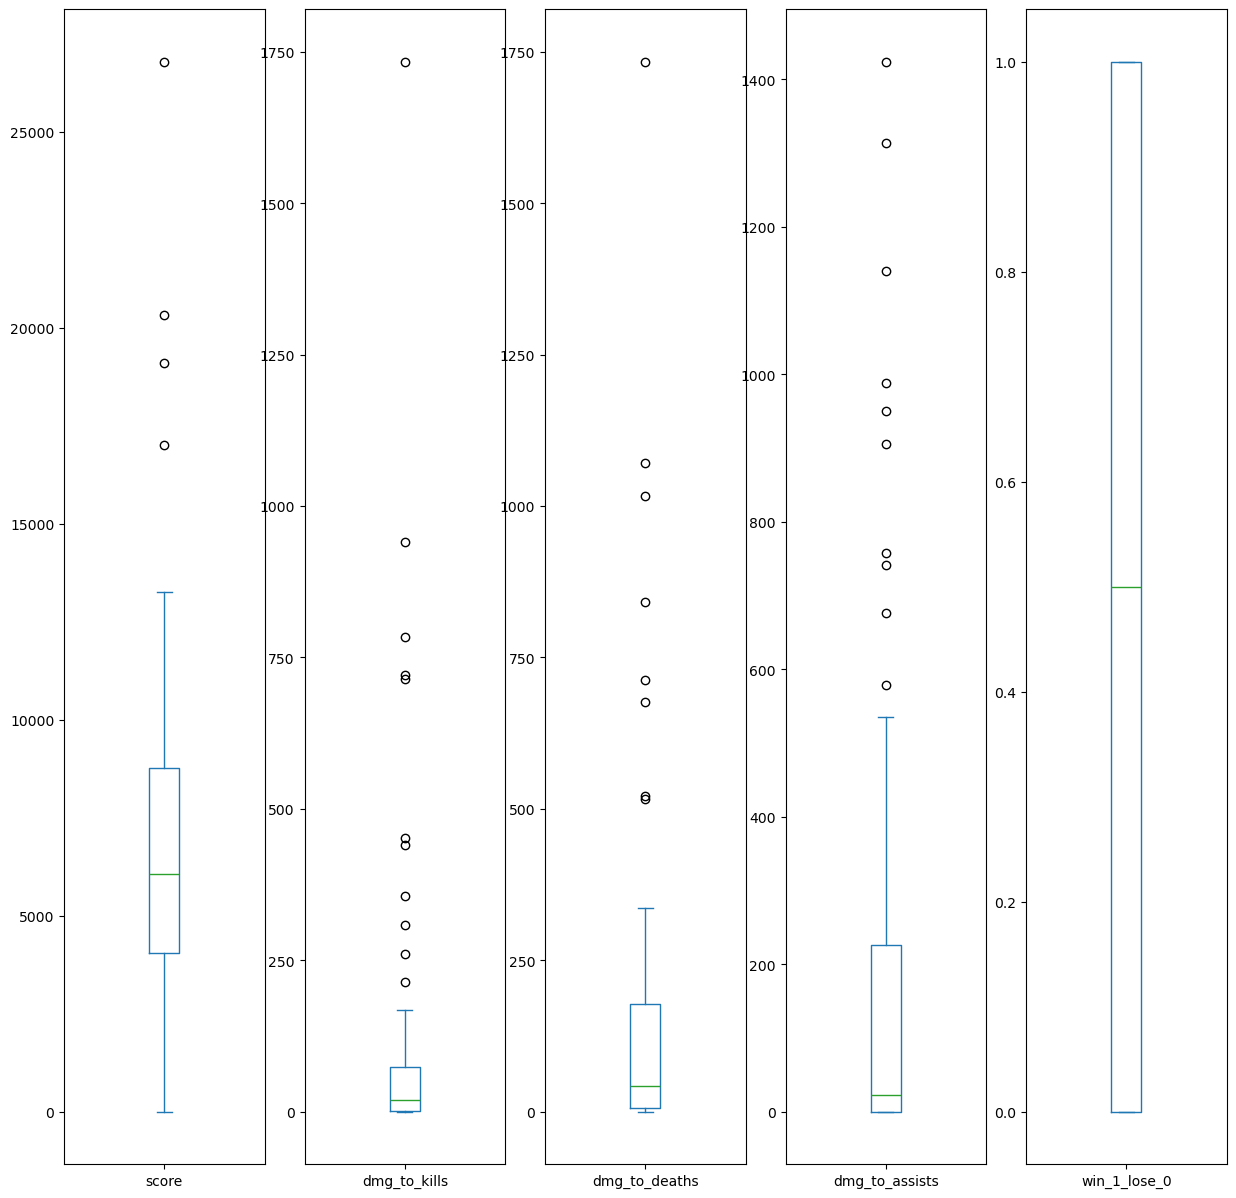

In [194]:
player_extra_df.plot(kind = "box", subplots = True, figsize=(15,15))

In [195]:
player_extra_df.columns

Index(['Character', 'Type', 'season', 'num_matches', 'win_rate', 'num_MVP',
       'num_SVP', 'dmg_per_min', 'heal_per_min', 'kill_death',
       'kill_death_assist', 'kills', 'assists', 'deaths', 'avg_kda',
       'hours_played', 'score', 'dmg_to_kills', 'dmg_to_deaths',
       'dmg_to_assists', 'win_1_lose_0'],
      dtype='object')

**Note**

Only dmg_per_min and score columns have a normal distribution

So StandardScaler applies to ['score'] and ['dmg_per_min']

The rest of the columns use RobustScaler because they are all skewed, and the outliers are meaningful

In [196]:
# transformer
normal_cols = ['dmg_per_min','score']
outlier_cols = ['num_matches', 'win_rate', 'num_MVP',
               'num_SVP', 'dmg_per_min', 'heal_per_min', 'kill_death',
               'kill_death_assist', 'kills', 'assists', 'deaths', 'avg_kda',
               'hours_played', 'score', 'dmg_to_kills', 'dmg_to_deaths',
               'dmg_to_assists']
cat_cols = ['Character','Type','season']

preprocessor = ColumnTransformer(
    transformers = [
        ('categorical', OneHotEncoder(sparse_output=False, handle_unknown="ignore"), cat_cols),
        ('standard', StandardScaler(), normal_cols),
        ('robust', RobustScaler(), outlier_cols)
    ],
    remainder = 'drop' #drop columns not specified
)

In [197]:
# split data
X = player_extra_df.drop('win_1_lose_0', axis = 1)
y = player_extra_df['win_1_lose_0']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#fit transformers to X train only
preprocessor.fit(X_train)

#transform both X_train and X_test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## Model Selection, Training - Classification
- Train on every possible models to see best performer
- Predict Win 1 or Lose 0. So classification is more suitable

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import time

In [199]:
#define every models
models = {
    'Logistic Regression': LogisticRegression(max_iter = 5000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Adaboost': AdaBoostClassifier(random_state=42),
    'Neural Network': MLPClassifier(max_iter = 5000, random_state=42),
    'Naive Bayes': GaussianNB()
}

results = []
for name, model in models.items():
    start_time = time.time()

    #train
    model.fit(X_train_processed, y_train)
    #predict
    y_pred = model.predict(X_test_processed)

    #show metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    #show training time
    train_time =time.time() - start_time
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Training Time (s)': train_time
    })

C:\Users\Sroeunchamroeunphal\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [200]:
results_df = pd.DataFrame(results).sort_values('Accuracy', ascending = False)
print(results_df)

                    Model  Accuracy  F1 Score  Precision  Recall  \
3           Decision Tree  1.000000  1.000000   1.000000   1.000   
4           Random Forest  1.000000  1.000000   1.000000   1.000   
5       Gradient Boosting  1.000000  1.000000   1.000000   1.000   
6                Adaboost  1.000000  1.000000   1.000000   1.000   
0     Logistic Regression  0.791667  0.761905   0.615385   1.000   
7          Neural Network  0.750000  0.727273   0.571429   1.000   
1     K-Nearest Neighbors  0.666667  0.636364   0.500000   0.875   
8             Naive Bayes  0.666667  0.600000   0.500000   0.750   
2  Support Vector Machine  0.375000  0.516129   0.347826   1.000   

   Training Time (s)  
3           0.005340  
4           0.084819  
5           0.045680  
6           0.006541  
0           0.043590  
7           0.012119  
1           0.007901  
8           0.005571  
2           0.004265  


In [201]:
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

print(f"Best model: {best_model_name} with accuracy: {results_df.iloc[0]['Accuracy']:.4f}")

Best model: Decision Tree with accuracy: 1.0000


**This is unrealistic, so we are going to manually choose Logistic Regression instead**

In [202]:
best_model_name = 'Logistic Regression'
best_model = models[best_model_name]

print(f"Best Model: {best_model}")
print(f"Accuracy: {results_df.loc[results_df['Model'] == best_model_name, 'Accuracy'].values[0]:.4f}")

Best Model: LogisticRegression(max_iter=5000, random_state=42)
Accuracy: 0.7917


## Model Evaluation
- Classification report(auc, roc_curve)

              precision    recall  f1-score   support

           0       1.00      0.69      0.81        16
           1       0.62      1.00      0.76         8

    accuracy                           0.79        24
   macro avg       0.81      0.84      0.79        24
weighted avg       0.87      0.79      0.80        24



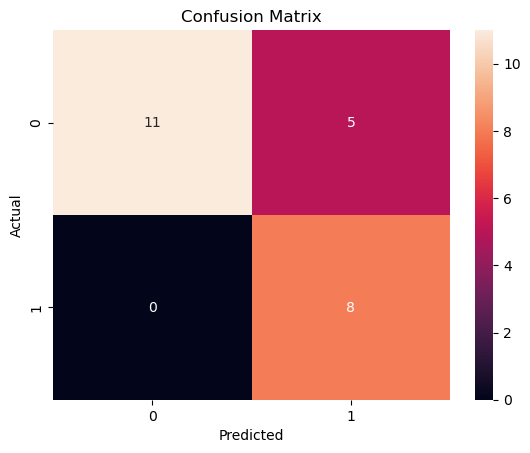

In [203]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

y_pred = best_model.predict(X_test_processed)

#confusion matrix
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

print(classification_report(y_test, y_pred))

**Analysis for predictions**: 
- True Positive: 11 positive class classified correctly
- True Negative: 8 negative class classified correctly
- False Positive: 5 negative class but being classified wrongly as belonging to the positive class
- False Negative: 0 positive class but being classified wrongly as belonging to the negative class

**Notes** 
- 16 samples in class 0
- 8 samples in class 1

**Class 0**
- when model predicts class 0, precision perfect = 1.00
- model fails to predict about 31% of class 0, lower recall = 0.69
- good balance between precision and recall, f1 score = 0.81


**Class 1**
- model captures all actual class 1 instances, perfect recall = 1.00
- fails to predict about 38% of class 1, lower recall = 0.62
- good balance between precision and recall, f1 score = 0.76

**Overall**
- accuracy: 0.79 (79% correct predictions)
- macro average F1: 0.79 (average of F1)
- weighted average F1: 0.80 (weighted by class distribution)

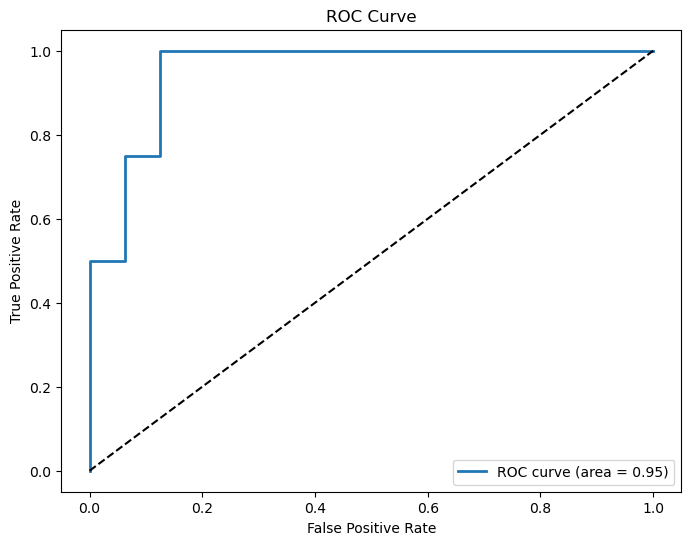

In [204]:
try:
    y_prob = best_model.predict_proba(X_test_processed)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
except:
    print("Model doesn't support probability predictions")

## Save Model

In [205]:
import joblib

joblib.dump(preprocessor, 'marvel_rivals_preprocessor.pkl')
joblib.dump(best_model, 'marvel_rivals_prediction_model.pkl')

['marvel_rivals_prediction_model.pkl']

## For Future Use

In [206]:
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', best_model)
])

joblib.dump(full_pipeline, 'full_marvel_rivals_pipeline.pkl')

['full_marvel_rivals_pipeline.pkl']

In [207]:
#returns a new column in the new_data dataset showing win or lose probability
def predict_win_lose(new_data):
    pipeline = joblib.load("full_marvel_rivals_pipeline.pkl")
    try:
        win_prob = pipeline.predict_proba(new_data)[:, 1]
        result = new_data.copy()
        result['win_probability'] = win_prob
        return result

    except:
        #if model doesn't support probability
        win_prediction = pipeline.predict(new_data)
        result = new_data.copy()
        result['win_prediction'] = win_pred
        return result